 # Problem Set 1: Trees IMT 575: Scaling, Applications, and Ethics


## Part 1: Creating helper functions


**1. Create a helper function to calculate Gini impurity called “calcGini”. This function should take in two values which represent a count of each class (we can assume only two classes for this problem set) and output the Gini impurity.**


In [1]:
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score 
from sklearn.metrics import confusion_matrix 
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
def calcGini(c1, c2):
    if c1 == 0 and c2 ==0:
        return 0
    p1 = c1/(c1+c2)
    p2 = c2/(c1+c2)
    return 1-(np.square(p1) + np.square(p2))


**2. Create a helper function to calculate Gini impurity called “calcEntropy”. This function should take in two values which represent a count of each class (we can assume only two classes for this problem set) and output the entropy. (Note: be sure the function appropriately accounts for zero values)**

In [3]:
def calcEntropy(c1,c2) :
    if c1 is None or c2 is None:
        return 0
    if(c1==0 or c2==0):
        return 0
    p1 = c1/(c1+c2)
    p2 = c2/(c1+c2)
    return - p1*np.log2(p1) - (p2)*np.log2(p2) 

**3. Create a helper function to calculate weighted sums called “weightedSum”. This function should take in two lists - one of values and one of weights/counts - and should output the weighted sum of the values as weighted by weights/counts**

In [4]:
def weightedSum(value:list, weightcounts :list):
    return np.sum(np.multiply(value,weightcounts))

    

**4. Verify that your functions are working as expected. Use the same dataset/calculations from lecture and calculate the Gini impurity and entropy for each column. The data can be found in the toyData.csv ﬁle.**

Answer : Imported the dataset and verified the entropy and gini index values I got for each variable.
From running the code against my output variable, I got my gini index value for the predictor variables A,B,C as 0.27, 0.47 and 0.34 respectively and entropy value for the the predictor variables A,B,C as 0.551, 0.951 and 0.69 respectively.

In [5]:
#Loading the dataset
toy_data = pd.read_csv('D:\\IMT 575\\Datasets\\toyData.csv')

#Creating two dataframes
predictors = toy_data.iloc[:,:3]
output = toy_data[['Output']]

#Calculating the count of variable A being yes/No, B being On/off,C being High/low
variableA = predictors.iloc[:,0].value_counts()
variableB = predictors.iloc[:,1].value_counts()
variableC = predictors.iloc[:,2].value_counts()


In [6]:
cols = toy_data.columns[:3]

#Iterating and calculating gini impurity and entropy for the outcome being Red/Blue given A being yes/no ,given B being On/Off,C being high/low
gini_values = []
entropy_values=[]
for i in cols:
    current = toy_data[i]
    uniqueValues = current.unique()
    for j in uniqueValues:
        current_predictors = toy_data[toy_data[i]==j]
        reds = len(current_predictors[current_predictors['Output']=='Red'])
        blues = len(current_predictors[current_predictors['Output']=='Blue'])
        #print(calcGini(reds,blues))
        print(calcEntropy(reds,blues))
        #Storing the gini impurity and entopry values of A,B and C wrt to our Outcome variable in a list
        gini_values.append(calcGini(reds,blues))
        entropy_values.append(calcEntropy(reds,blues))

0.9182958340544896
0
0.9182958340544896
1.0
0.9852281360342515
0


In [7]:
##Now calculating the Gini Impurity of variable A ,B and C using weighted sum
prob_A = []
prob_B = []
prob_C = []
prob_A = variableA/(predictors['Variable A'].count())
prob_B = variableB/(predictors['Variable B'].count())
prob_C = variableC/(predictors['Variable C'].count())
giniA = round(weightedSum(prob_A,gini_values[0:2]),2)
giniB = round(weightedSum(prob_B,gini_values[2:4]),2)
giniC = round(weightedSum(prob_C,gini_values[4:6]),2)

print("The gini index for Variable A is ",giniA)
print("The gini index for Variable B is ",giniB)
print("The gini index for Variable C is ",giniC)

The gini index for Variable A is  0.27
The gini index for Variable B is  0.47
The gini index for Variable C is  0.34


In [8]:
# calculating the Entropy of variable A ,B and C using weighted sum
entropyA = round(weightedSum(prob_A,entropy_values[0:2]),3)
entropyB = round(weightedSum(prob_B,entropy_values[2:4]),3)
entropyC = round(weightedSum(prob_C,entropy_values[4:6]),3)

print("The entropy for Variable A is ",entropyA)
print("The entropy for Variable B is ",entropyB)
print("The entropy for Variable C is ",entropyC)

The entropy for Variable A is  0.551
The entropy for Variable B is  0.951
The entropy for Variable C is  0.69


## Part 2: Building trees

**5. Import the Boston using dataset using sklearn.datasets. Create a new column called “highPriced” that is a boolean indicator of whether the target value in the dataset (i.e. MEDV or median home value) is greater than $35K.The variable “highPriced” will be our response/output variable going forward. What are some interesting features of this variable?**

Answer : On creating the highPriced variable assigning 1 to values where the median home price is greater than 35k, I can see that the ratio of 1 to 0s for this varible is 48:458. This shows that the variable is highly dispropotionate with more housing prices skewed to be less than 35k which could cause a class imabalance.

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()

In [10]:
#Converting to pandas dataframe
boston_data = pd.DataFrame(boston.data,
                     columns= boston.feature_names)

In [11]:
#Setting the target variable
boston_data['MEDV'] = boston.target

In [12]:
#VIewig the fields of the dataset
boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [13]:
#Creating the new variable highPriced based on the conditions
boston_data['highPriced'] = boston_data['MEDV'].apply(lambda x: 1 if x>35 else 0)
        

In [14]:
#Determining the number of 1 and 0s in our target variable
print("Number of 1's in highPrice variable are ",len(boston_data[boston_data['highPriced']==1])) 
print("Number of 0's in highPrice variable are ",len(boston_data[boston_data['highPriced']==0])) 


Number of 1's in highPrice variable are  48
Number of 0's in highPrice variable are  458


**6. Using your helper functions and with highPriced as your output, ﬁnd what the best split is along the AGE variable using each of Gini impurity and entropy as the splitting criterion. (Hint: it may help to build this process as a function because you will be doing it many times throughout this problem set.) Assume the “left” side of each split contains all values less than and the “right” side contains all values equal to or greater than. What is the optimal split point when using Gini impurity? What about when using entropy? What if we calculate the same using the CRIM variable? Comment on any similarities and diﬀerences.**

Answer: On creating a function called BestSplit to determine the best split along any predictor variable by iterating through the values of each age and determining the gini impurity and entropy for each unique value of age across the dataset, I get the optimal split point for age using both gini impurity and entropy as 37.3.

However, when determining the best split across the CRIM variable, i get the best split value using Gini Impurity as 0.02187 and when using entropy as 9.32909.

In [15]:
#Creating two dataframes of our predictors and target
predictors = boston_data.iloc[:,:13]
output = boston_data['highPriced']
output=output.tolist()

In [16]:
#This function determines the entropy and gini impurty across all values of predictors and prints the predictor value for best split
def BestSplit(inputFeatures,target):
    featureList = inputFeatures.columns
    finalDf = pd.concat([inputFeatures, target], axis = 1)
    initialEntropy = calcEntropy(len(finalDf[finalDf[target.columns[0]] == 1]), 
                                        len(finalDf[finalDf[target.columns[0]] == 0]))
    minEntropy = math.inf
    minGini = math.inf
    featureValForMinGini = 0
    featureValForMinEntropy = 0
    featureWithMinEntropy = ''

    for feature in featureList:
        featureUniqValues = finalDf[feature].unique()
        for val in featureUniqValues:
            
            # Lists to store the gini value and corresponding weights
            giniValList = []
            entropyValList = []
            weightList = []
            
            # Segregating the values to the left and right tree based on the current value of the feature
            leftSideOfTree = finalDf[finalDf[feature] < val]
            rightSideOfTree = finalDf[finalDf[feature] >= val]
            
            # Calculating Gini Value for left tree
            giniValList.append(calcGini(len(leftSideOfTree[leftSideOfTree[target.columns[0]] == 1]), 
                                        len(leftSideOfTree[leftSideOfTree[target.columns[0]] == 0])))
            entropyValList.append(calcEntropy(len(leftSideOfTree[leftSideOfTree[target.columns[0]] == 1]), 
                                        len(leftSideOfTree[leftSideOfTree[target.columns[0]] == 0])))
            weightList.append(len(leftSideOfTree)/len(finalDf))
            
            
            # Calculating Gini Value for Right tree
            
            giniValList.append(calcGini(len(rightSideOfTree[rightSideOfTree[target.columns[0]] == 1]), 
                                        len(rightSideOfTree[rightSideOfTree[target.columns[0]] == 0])))
            
            entropyValList.append(calcEntropy(len(rightSideOfTree[rightSideOfTree[target.columns[0]] == 1]), 
                                        len(rightSideOfTree[rightSideOfTree[target.columns[0]] == 0])))
            
            weightList.append(len(rightSideOfTree)/len(finalDf))
            
            
            # Calculating final gini for current value of the feature
            finalGini = weightedSum(giniValList, weightList)
            
            # Calculating final entropy for current value of the feature
            finalEntropy = weightedSum(entropyValList, weightList)
            
            
            # Updating the minimum gini for final result
            if finalGini < minGini:
                minGini = finalGini
                featureValForMinGini = val
                
            if finalEntropy < minEntropy:
                minEntropy = finalEntropy
                featureValForMinEntropy = val
                featureWithMinEntropy = feature
            
                
    print('The best split value using Gini Index is',str(featureValForMinGini), ' and was achieved with ', featureWithMinEntropy,' variable')
    
    print('The best split value using Entropy is',str(featureValForMinEntropy), ' and was achieved with ', featureWithMinEntropy,' variable')
    
    #return [featureWithMinEntropy, featureValForMinEntropy]
    
BestSplit(pd.DataFrame(boston_data['AGE']), pd.DataFrame(boston_data['highPriced']))
BestSplit(pd.DataFrame(boston_data['CRIM']), pd.DataFrame(boston_data['highPriced']))


The best split value using Gini Index is 37.3  and was achieved with  AGE  variable
The best split value using Entropy is 37.3  and was achieved with  AGE  variable
The best split value using Gini Index is 0.02187  and was achieved with  CRIM  variable
The best split value using Entropy is 9.32909  and was achieved with  CRIM  variable


**7. Import sklearn’s DecisionTreeClassiﬁer and ﬁnd what the optimal split is along the AGE variable using entropy. Show that the optimal value as calculated by sklearn’s classiﬁer is 37.25. If this is diﬀerent than what you calculated, explain why and adjust your outputs so it gives you the same value. (Hint: you may have implemented a splitting method that looked at axis-aligned splits at every data point whereas sklearn looks at axis-aligned splits between every pair of data points.)**

Answer : In the previous question, I had taken each age value present in the dataset to determine the best split value based on our outcome variable and hence the age in the dataset with the lowest entropy value was determined as 37.3. However, as the hint mentions, sklearn looks at axis alined splits between every "pair of datapoints". Hence inorder to make my previous function perform as the Decision Tree Classifier(created a new function BestSplitModify below), I created my splitting points by sorting the age values and calculating the mean between each pair of adjacent data points. On using these points to determine the best split, I obtained my best split at the age value of 37.25 that was the mean of the two age data points 37.2 and 37.3 present in the age column.

The root best split for age variable occurs at  37.25


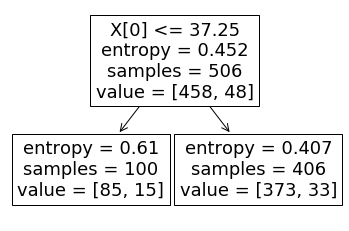

In [17]:

#Creating our decision tree for age as our predictor
clf = DecisionTreeClassifier(random_state=0,criterion="entropy",splitter='best',max_depth=1)
predict = np.array(boston_data[['AGE']])
output = np.array(boston_data[['highPriced']])
#Fitting our model taking LSTAT and RM as our predictors
model = clf.fit(predict,output)
threshold = clf.tree_.threshold #Storing all the split thresholds from top to bottom
print("The root best split for age variable occurs at ",threshold[0])
plot=tree.plot_tree(model)



In [18]:
def BestSplitModify(inputFeatures,target):
    featureList = inputFeatures.columns
    finalDf = pd.concat([inputFeatures, target], axis = 1)
    initialEntropy = calcEntropy(len(finalDf[finalDf[target.columns[0]] == 1]), 
                                        len(finalDf[finalDf[target.columns[0]] == 0]))
    minEntropy = math.inf
    minGini = math.inf
    featureValForMinGini = 0
    featureValForMinEntropy = 0
    featureWithMinEntropy = ''
   
    for feature in featureList:
        meanList =[]
        valList = []
        valList = sorted(finalDf[feature].tolist())
        for i in range(0,len(valList)-2):
            meanList.append((valList[i]+valList[i+1])/2)
        #print("mean lis",meanList)
        featureUniqValues = list(set(meanList))
        for val in featureUniqValues:
            
            # Lists to store the gini value and corresponding weights
            giniValList = []
            entropyValList = []
            weightList = []
            
            # Segregating the values to the left and right tree based on the current value of the feature
            leftSideOfTree = finalDf[finalDf[feature] < val]
            rightSideOfTree = finalDf[finalDf[feature] >= val]
            
            # Calculating Gini Value for left tree
            giniValList.append(calcGini(len(leftSideOfTree[leftSideOfTree[target.columns[0]] == 1]), 
                                        len(leftSideOfTree[leftSideOfTree[target.columns[0]] == 0])))
            entropyValList.append(calcEntropy(len(leftSideOfTree[leftSideOfTree[target.columns[0]] == 1]), 
                                        len(leftSideOfTree[leftSideOfTree[target.columns[0]] == 0])))
            weightList.append(len(leftSideOfTree)/len(finalDf))
            
            
            # Calculating Gini Value for Right tree
            
            giniValList.append(calcGini(len(rightSideOfTree[rightSideOfTree[target.columns[0]] == 1]), 
                                        len(rightSideOfTree[rightSideOfTree[target.columns[0]] == 0])))
            
            entropyValList.append(calcEntropy(len(rightSideOfTree[rightSideOfTree[target.columns[0]] == 1]), 
                                        len(rightSideOfTree[rightSideOfTree[target.columns[0]] == 0])))
            
            weightList.append(len(rightSideOfTree)/len(finalDf))
            
            
            # Calculating final gini for current value of the feature
            finalGini = weightedSum(giniValList, weightList)
            
            # Calculating final entropy for current value of the feature
            finalEntropy = weightedSum(entropyValList, weightList)
            
            
            # Updating the minimum gini for final result
            if finalGini < minGini:
                minGini = finalGini
                featureValForMinGini = val
                
            if finalEntropy < minEntropy:
                minEntropy = finalEntropy
                featureValForMinEntropy = val
                featureWithMinEntropy = feature
            
                
   
    
    return [featureWithMinEntropy, featureValForMinEntropy]
    
print(BestSplitModify(pd.DataFrame(boston_data['AGE']), pd.DataFrame(boston_data['highPriced'])))
print(BestSplitModify(pd.DataFrame(boston_data['CRIM']), pd.DataFrame(boston_data['highPriced'])))


['AGE', 37.25]
['CRIM', 9.280695000000001]


**8. Using the RM, LSTAT, and RAD variables, build a a decision tree with 2 levels (3 split points, 4 leaf nodes) based on entropy. Show the splits as a pandas DataFrame with the following columns: level (indicates which level of the tree the split occurs. You should have a 1 once and 2 twice), col (indicates the column across which the split occurs), and threshold (indicates the threshold used in the split). Keep in mind that when building this tree, each split necessitates that you ﬁnd the optimal split for that data subset across all three variables. Your output should resemble the table below.
level col threshold 1 ﬁrst split here (variable/column) ﬁrst split here (threshold/value) 2 Left side split here (variable/column) Left side split here (threshold/value) 2 Right side split here (variable/column) Right side split here (threshold/value)**

In [19]:
#This function determines the best split across a set of predictor variables and returns the level, column and threshold for split
def treeCreator(variableList, target):
    
    finalDf = pd.concat([variableList, target], axis = 1)
    featureCols = list(variableList.columns)
    #Creating the output dataframe storing the level,column and threshold at which each split occurs
    outputDf = pd.DataFrame(columns = ['level', 'col','threshold'])
    
    # Root Level Split
    InitialSplit = BestSplitModify(variableList,target)
    outputDf = outputDf.append({'level':1, 'col':InitialSplit[0], 'threshold': InitialSplit[1]},ignore_index=True)
    #featureCols.remove(InitialSplit[0])
    
    # Generating left and right trees after root split
    leftSideOfTree = finalDf[finalDf[InitialSplit[0]] < InitialSplit[1]]
    rightSideOfTree = finalDf[finalDf[InitialSplit[0]] >= InitialSplit[1]]

    # Splitting the left subtree
    leftSplit = BestSplitModify(leftSideOfTree[featureCols], leftSideOfTree[target.columns])
    outputDf = outputDf.append({'level':2, 'col':leftSplit[0], 'threshold': leftSplit[1]},ignore_index=True)
    #featureCols.remove(leftSplit[0])
    
    # Splitting the Right subtree
    rightSplit = BestSplitModify(rightSideOfTree[featureCols], rightSideOfTree[target.columns])
    outputDf = outputDf.append({'level':2, 'col':rightSplit[0], 'threshold': rightSplit[1]},ignore_index=True)

    
    #Printing the output as a data frame
    print(outputDf)
    return outputDf


In [20]:
treedata = treeCreator(pd.DataFrame(boston_data[['RM', 'LSTAT','RAD']]), pd.DataFrame(boston_data['highPriced'])) 

  level    col  threshold
0     1     RM      6.941
1     2  LSTAT      9.535
2     2     RM      7.437


**9. Visualize your splits on an X-Y plane. Set the x-axis to be RM and the y-axis to be LSTAT. Plot the target variable and use straight lines to indicate the axis-aligned splits for your 2-level decision tree. Make sure your visualization is understandable and comment on what you see**

Answer: From the visualization I can see that the not high priced values are concentrated across RM values in the range of 4 to 8 while the high priced values are concentrated across RM values in the range of 6 to 9  . On plotting the three threshold values obtained from the previous question, it is seen that the function first finds the best split across the RM value of 6.947 which seems to be an intersection across both the concentrated range values, then across the LSTAT value of 9.535 and finally across RM at a value of 7.437.

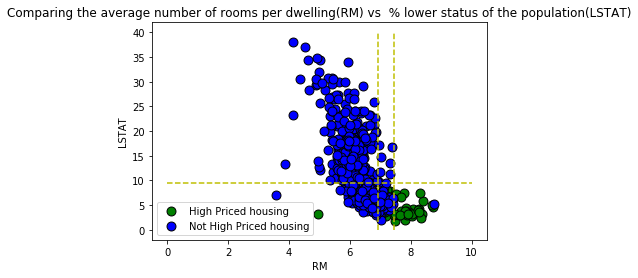

In [21]:
#Diving the target variable based on its two outcomes
high_price_yes = boston_data[boston_data.highPriced == 1]
high_price_no = boston_data[boston_data.highPriced == 0]
plt.scatter(high_price_yes['RM'], high_price_yes['LSTAT'], c='g', edgecolor='k',s=80, label ="High Priced housing")
plt.scatter(high_price_no['RM'], high_price_no['LSTAT'], c='b', edgecolor='k', s=80,label ="Not High Priced housing")
plt.xlabel('RM')
plt.ylabel('LSTAT')
plt.title("Comparing the average number of rooms per dwelling(RM) vs  % lower status of the population(LSTAT)")
plt.plot([treedata.iloc[0][2],treedata.iloc[0][2]],[0,40],c ='y', linestyle='dashed')
plt.plot([0,10],[treedata.iloc[1][2],treedata.iloc[1][2]],c ='y', linestyle='dashed')
plt.plot([treedata.iloc[2][2],treedata.iloc[2][2]],[0,40],c ='y', linestyle='dashed')
plt.legend()
plt.show()

## Part 3: Making predictions


**10. Create a training/test split for your data. Assume the data is already randomized and select every 5th observation from the original dataset to be in your test data (i.e. when working in Pandas, your test dataframe should contain index 0, 5, 10, 15, ...) and all other observations in your training data. How many observations are in your training and test datasets, respectively? How does the target variable look across the two datasets?**

In [22]:
bostonData_train = boston_data[boston_data.index%5 != 0]
bostonData_test = boston_data[boston_data.index%5 == 0]

print('Number of observations in training dataset', len(bostonData_train))
print('Number of observations in test dataset', len(bostonData_test))

Number of observations in training dataset 404
Number of observations in test dataset 102


In [23]:
# How does the target variable look across the two datasets

# We will check the percentage of values that are 1 and 0 in both train and test datasets to see how the target variable looks


print('Training Dataset Distribution')
print('%Yes for target variable', round(100* len(bostonData_train[bostonData_train['highPriced']==1])/len(bostonData_train),2),'%')
print('%No for target variable', round(100* len(bostonData_train[bostonData_train['highPriced']==0])/len(bostonData_train),2),'%')
print('-----------------------------------------------------------------------------------------')
print('Testing Dataset Distribution')
print('%Yes for target variable', round(100* len(bostonData_test[bostonData_test['highPriced']==1])/len(bostonData_test),2),'%')
print('%No for target variable', round(100* len(bostonData_test[bostonData_test['highPriced']==0])/len(bostonData_test),2),'%')

Training Dataset Distribution
%Yes for target variable 10.15 %
%No for target variable 89.85 %
-----------------------------------------------------------------------------------------
Testing Dataset Distribution
%Yes for target variable 6.86 %
%No for target variable 93.14 %


**11. Create a baseline set of predictions. In classiﬁcation tasks, when reaching a leaf node that is not pure, predictions are often made by randomly selecting from training observations in the corresponding node. Suppose you had a tree with zero splits across your training dataset (i.e. the entirety of your training dataset) and you made predictions for your test dataset. In other words, “predict” values for your test dataset by randomly sampling (with replacement) from the target variable across the entirety of your training dataset. How do your predictions fare in terms of accuracy and other metrics? (Note: when comparing subsequent classiﬁers, use not only accuracy, but other metrics as well. Also, contextualize diﬀerences you may ﬁnd.)**

Answer : On selecting the predictor values by randomly sampling accross the training dataset with replacement, I obtained an accuracy of 85%. This shows that even without creating a model the dataset can achieve high accuracy by just randomly sampling predicted values.
However on further evaluating the predictions based on precision and recall, I obtained a precision of 94% for the predictions made on the target variable to not be high priced and a precision of 17% for the predictions made on the target variable to be high priced. Similarly, I obtained a recall of 89% for the predictions made on the target variable to not be high priced and a recall of 21% for the predictions made on the target variable to be high priced. This shows that while the accuracy of the predictions returned is high, the predictions are not properly classifying the values where the target variable is labelled 'Yes'.

This can be accounted by the fact that there is a high class imbalance of yes and no's (1 and 0's) for our target variable. Hence while we get a high precision when we are predicting the outcome as "No" it fails when it is made to classify unobserved data and so during the random sampling it cannot accurately predict the 'Yes' values of the target variable.

In [24]:
#Creating a function predictions that predicts the training values by randomly sampling from the testset
def predictions():
    predictval=(np.random.choice(bostonData_train['highPriced'], size=len(bostonData_test), replace=True, p=None))
    actualval = pd.Series(bostonData_test['highPriced'],name='Actual')
    #print(actualval)
    print("Confusion Matrix :")
    print(confusion_matrix(actualval,predictval))
    print('Accuracy of the predictions are:',accuracy_score(actualval, predictval))
    print(classification_report(actualval, predictval))
predictions()

Confusion Matrix :
[[81 14]
 [ 6  1]]
Accuracy of the predictions are: 0.803921568627451
              precision    recall  f1-score   support

           0       0.93      0.85      0.89        95
           1       0.07      0.14      0.09         7

    accuracy                           0.80       102
   macro avg       0.50      0.50      0.49       102
weighted avg       0.87      0.80      0.84       102



**12. Now, use a 2-level decision tree to make predictions. Re-train a 2-level decision tree (i.e. a tree with 4 leaf nodes) using the training dataset with only the RM and LSTAT variables as inputs. How does it compare to the decision tree you built using the entirety of the data? Again, at each leaf node, randomly sample the output values from the training observations to make predictions for the test set. How do the predictions from this classiﬁer compare to the baseline you created in question 11?**

Answer : On recreating the 2-level decision tree on the training set, the threshold values for the splits have changed and have gotten lowered as compared to the decision tree built on the entire dataset. As seen below the threshold values for the three splits occur first taking the variable RM at a value of 7.127, then taking the variable LSTAT at a value of 5.115 then taking the variable RM at a value of 7.437.

On determining the predictions at each leaf node,(treePredictions method) I obtain an accuracy of 95%, which is much higher than the accuracy obtained in Q11. Further, I obtained a precision of 99% for the classifications made on the target variable to not be high priced and a precision of 60% for the classifications made on the target variable to be high priced. This is much higher than the precision of obtained in the previous question.

Similarly, I obtained a recall of 96% for the classifications made on the target variable to not be high priced and a recall of 86% for the predictions made on the target variable to be high priced. 

This shows that on creating the model and sampling the predictions based on the leaf nodes, the model is able to better classify our target variable on unobserved data.

In [25]:
#This function creates a 2 level decision tree across our training dataset
def train_tree(variableList, target):
    
    finalDf = pd.concat([variableList, target], axis = 1)
    featureCols = list(variableList.columns)
    outputDf = pd.DataFrame(columns = ['level', 'col','threshold'])
    
    # Root Level Split
    InitialSplit = BestSplitModify(variableList,target)
    outputDf = outputDf.append({'level':1, 'col':InitialSplit[0], 'threshold': InitialSplit[1]},ignore_index=True)

    
    # Generating left and right trees after root split
    leftSideOfTree = finalDf[finalDf[InitialSplit[0]] < InitialSplit[1]]
    rightSideOfTree = finalDf[finalDf[InitialSplit[0]] >= InitialSplit[1]]

    # Splitting the left subtree
    leftSplit = BestSplitModify(leftSideOfTree[featureCols], leftSideOfTree[target.columns])
    outputDf = outputDf.append({'level':2, 'col':leftSplit[0], 'threshold': leftSplit[1]},ignore_index=True)
    
    #Storing left and right leaf node of left side of tree
    leftNodeleftLeaf =  leftSideOfTree[leftSideOfTree[leftSplit[0]]<leftSplit[1]]
    leftNoderightLeaf = leftSideOfTree[leftSideOfTree[leftSplit[0]]>=leftSplit[1]]
    
    
    
    
    # Splitting the Right subtree
    rightSplit = BestSplitModify(rightSideOfTree[featureCols], rightSideOfTree[target.columns])
    outputDf = outputDf.append({'level':2, 'col':rightSplit[0], 'threshold': rightSplit[1]},ignore_index=True)
     
  
  
    #print(outputDf)
  
    return outputDf
  


train_tree(pd.DataFrame(bostonData_train[['RM', 'LSTAT']]), pd.DataFrame(bostonData_train['highPriced']))

,level,col,threshold
0,1,RM,7.127
1,2,LSTAT,5.115
2,2,RM,7.437


In [26]:
#This function is used to determine the probabilities of our leaf nodes wrt to our outcome variable
#to validate the probabilities of the leaf nodes as mentioned in Q13
def probLeaf(variableList,target):
    finalDf = pd.concat([variableList, target], axis = 1)
    featureCols = list(variableList.columns)
    
    # Root Level Split
    InitialSplit = BestSplitModify(variableList,target)
    
    # Generating left and right trees after root split
    leftSideOfTree = finalDf[finalDf[InitialSplit[0]] < InitialSplit[1]]
    rightSideOfTree = finalDf[finalDf[InitialSplit[0]] >= InitialSplit[1]]

    # Splitting the left subtree
    leftSplit = BestSplitModify(leftSideOfTree[featureCols], leftSideOfTree[target.columns])
    
    #Storing left and right leaf node of left side of tree
    leftNodeleftLeaf =  leftSideOfTree[leftSideOfTree[leftSplit[0]]<leftSplit[1]]
    leftNoderightLeaf = leftSideOfTree[leftSideOfTree[leftSplit[0]]>=leftSplit[1]]
      
    
    # Splitting the Right subtree
    rightSplit = BestSplitModify(rightSideOfTree[featureCols], rightSideOfTree[target.columns])
     
    #Storing left and right leaf node of right side of tree
    rightNodeleftLeaf =  rightSideOfTree[rightSideOfTree[rightSplit[0]]<rightSplit[1]]
    rightNoderightLeaf = rightSideOfTree[rightSideOfTree[rightSplit[0]]>=rightSplit[1]]
    
     #Calculating the distribution of target  variable accross left and right leafs
    leftNodeleftLeafYes =  len(leftNodeleftLeaf[leftSideOfTree[target.columns[0]] == 1])
    leftNodeleftLeafNo = len(leftNodeleftLeaf[leftNodeleftLeaf[target.columns[0]]==0])
    
    leftNoderightLeafYes = len(leftNoderightLeaf[leftNoderightLeaf[target.columns[0]]==1])
    leftNoderightLeafNo = len(leftNoderightLeaf[leftNoderightLeaf[target.columns[0]]==0])
    
    
    rightNodeleftLeafYes = len(rightNodeleftLeaf[rightNodeleftLeaf[target.columns[0]]==1])
    rightNodeleftLeafNo = len(rightNodeleftLeaf[rightNodeleftLeaf[target.columns[0]]==0])
    
    rightNoderightLeafYes = len(rightNoderightLeaf[rightNoderightLeaf[target.columns[0]]==1])
    rightNoderightLeafNo = len(rightNoderightLeaf[rightNoderightLeaf[target.columns[0]]==0])
    
    
    #Finding probabilities of outcome variables based on the leafs
    ProbleftNodeleftLeafYes = leftNodeleftLeafYes/(leftNodeleftLeafYes+leftNodeleftLeafNo)
    ProbleftNodeleftLeafNo = leftNodeleftLeafNo/ (leftNodeleftLeafYes+leftNodeleftLeafNo)
    
    print('For Left Node left leaf :')
    print('Probability of outcome variable being no is ',ProbleftNodeleftLeafNo)
    print('Probability of outcome variable being yes is ',ProbleftNodeleftLeafYes)
    print("")
    
    ProbleftNoderightLeafYes = leftNoderightLeafYes/(leftNoderightLeafYes+leftNoderightLeafNo)
    ProbleftNoderightLeafNo = leftNoderightLeafNo/(leftNoderightLeafYes+leftNoderightLeafNo)
    
    print('For Left Node right leaf :')
    print('Probability of outcome variable being no is ',ProbleftNoderightLeafNo)
    print('Probability of outcome variable being yes is ',ProbleftNoderightLeafYes)
    print("")
    
    ProbrightNodeleftLeafYes = rightNodeleftLeafYes/(rightNodeleftLeafYes+rightNodeleftLeafNo)
    ProbrightNodeleftLeafNo = rightNodeleftLeafNo/(rightNodeleftLeafYes+rightNodeleftLeafNo)
    
    print('For Right Node left leaf :')
    print('Probability of outcome variable being no is ',ProbrightNodeleftLeafNo)
    print('Probability of outcome variable being yes is ',ProbrightNodeleftLeafYes)
    print("")
    
    ProbrightNoderightLeafYes = rightNoderightLeafYes/(rightNoderightLeafYes +rightNoderightLeafNo)
    ProbrightNoderightLeafNo = rightNoderightLeafNo/(rightNoderightLeafYes +rightNoderightLeafNo)
    
    print('For Right Node right leaf :')
    print('Probability of outcome variable being no is ',ProbrightNoderightLeafNo)
    print('Probability of outcome variable being yes is ',ProbrightNoderightLeafYes)
    print("")
    
probLeaf(pd.DataFrame(bostonData_train[['RM', 'LSTAT']]), pd.DataFrame(bostonData_train['highPriced']))  

For Left Node left leaf :
Probability of outcome variable being no is  0.7777777777777778
Probability of outcome variable being yes is  0.2222222222222222

For Left Node right leaf :
Probability of outcome variable being no is  0.9909365558912386
Probability of outcome variable being yes is  0.00906344410876133

For Right Node left leaf :
Probability of outcome variable being no is  0.65
Probability of outcome variable being yes is  0.35

For Right Node right leaf :
Probability of outcome variable being no is  0.038461538461538464
Probability of outcome variable being yes is  0.9615384615384616



C:\Users\12064\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [27]:
#Creating a function called createLeafs that returns leaf nodes for a particular level based on the predictors and outcome variable passed
def createLeafs(variableList, target):
    
    finalDf = pd.concat([variableList, target], axis = 1)
    featureCols = list(variableList.columns)
    # Root Level Split
    InitialSplit = BestSplitModify(variableList,target)
   
    # Root Level Split
    
    # Generating left and right trees after root split
    leftSideOfTree = finalDf[finalDf[InitialSplit[0]] < InitialSplit[1]]
    rightSideOfTree = finalDf[finalDf[InitialSplit[0]] >= InitialSplit[1]]

    # Splitting the left subtree
    leftSplit = BestSplitModify(leftSideOfTree[featureCols], leftSideOfTree[target.columns])
    
    #Storing left and right leaf node of left side of tree
    leftNodeleftLeaf =  leftSideOfTree[leftSideOfTree[leftSplit[0]]<leftSplit[1]]
    leftNoderightLeaf = leftSideOfTree[leftSideOfTree[leftSplit[0]]>=leftSplit[1]]
    
    
    
    
    # Splitting the Right subtree
    rightSplit = BestSplitModify(rightSideOfTree[featureCols], rightSideOfTree[target.columns])
  

    
    #Storing left and right leaf node of right side of tree
    rightNodeleftLeaf =  rightSideOfTree[rightSideOfTree[rightSplit[0]]<rightSplit[1]]
    rightNoderightLeaf = rightSideOfTree[rightSideOfTree[rightSplit[0]]>=rightSplit[1]]
    
    
    
     
   
   
    

  
    
    #print("count of LefNodeleftLeafYes",leftNodeleftLeaf)
    return (leftNodeleftLeaf,leftNoderightLeaf,rightNodeleftLeaf,rightNoderightLeaf)
  




In [28]:
#This function is used to make predictions of the leaf nodes on the test 
def treePredictions(features) :
    #columns = X.columns
    splits = train_tree(pd.DataFrame(bostonData_train[['RM', 'LSTAT']]),pd.DataFrame(bostonData_train['highPriced']))
    leafs = createLeafs(pd.DataFrame(bostonData_train[['RM', 'LSTAT']]),pd.DataFrame(bostonData_train['highPriced']))
    leftNodeLeftLeaf = leafs[0]
    leftNodeRightLeaf = leafs[1]
    rightSideLeftLeaf = leafs[2]
    rightSideRightLeaf = leafs[3]
    
    #Creating an array pred, that stores the predicted values obtained from random sampling
    pred = np.zeros(len(features))
    for i in range(len(features)):
        #Determining if incoming row from test dataset is to be placed in left node leaf leaf 
        
        if(features.iloc[i]['RM'] < splits.iloc[0][2] and features.iloc[i]['LSTAT']< splits.iloc[1][2]) :
            pred[i] = (np.random.choice(leftNodeLeftLeaf['highPriced'], size=1, replace=True, p=None))
        #Determining if incoming row from test dataset is to be placed in left node right leaf
        elif(features.iloc[i]['RM'] < splits.iloc[0][2] and features.iloc[i]['LSTAT']>= splits.iloc[1][2]) :
            pred[i] = (np.random.choice(leftNodeRightLeaf['highPriced'], size=1, replace=True, p=None))
               
         #Determining if incoming row from test dataset is to be placed in right node left leaf

        elif(features.iloc[i]['RM'] >= splits.iloc[0][2] and features.iloc[i]['RM'] < splits.iloc[2][2]) :
            pred[i] = (np.random.choice(rightSideLeftLeaf['highPriced'], size=1, replace=True, p=None))

        
     #Determining if incoming row from test dataset is to be placed in right node right leaf
        if(features.iloc[i]['RM'] >= splits.iloc[0][2] and features.iloc[i]['RM'] >= splits.iloc[2][2]) :
            pred[i] = (np.random.choice(rightSideRightLeaf['highPriced'], size=1, replace=True, p=None))
   
    return pred;
            
            
            
            
           

            
        
  

In [29]:
#Determining the preidctions
actualval = pd.Series(bostonData_test['highPriced'],name='Actual')
predval = treePredictions(pd.DataFrame(bostonData_test[['RM', 'LSTAT']]))
print("Confusion Matrix :")
print(confusion_matrix(actualval,predval))
print('Accuracy of the predictions are:',accuracy_score(actualval, predval))
print(classification_report(actualval, predval))


Confusion Matrix :
[[90  5]
 [ 3  4]]
Accuracy of the predictions are: 0.9215686274509803
              precision    recall  f1-score   support

           0       0.97      0.95      0.96        95
           1       0.44      0.57      0.50         7

    accuracy                           0.92       102
   macro avg       0.71      0.76      0.73       102
weighted avg       0.93      0.92      0.93       102



**13. Use sklearn’s DecisionTreeClassiﬁer to recreate the decision tree that is trained on the training data. There may be slight diﬀerences in the predictions but show that 1) the splits are at the same locations as the tree you built and 2) the probabilities for the leaf nodes are also the same. How do the predictions from this classiﬁer compare to both your decision tree as well as the baseline you created in question 11?**

Answer : On plotting the decision tree we can see that the decision tree classifier does its initial split at a value of 7.127 for the variable RM, left split at a threshold value of 5.115 on LSTAT and right split at a threshold value of 7.437 on RM same as our decision tree above. Similarly we obtain the probabilities of our leaf nodes same as the probabilities calculated in the previous question (probLeaf method).
On determining predictions from the decision tree classifier, I get an accuracy of 97% that is slightly higher as compared to my decision tree created previously and much higher than the base line created in Q11.(Accuracy of 85%). However the precision of the model in correctly classifying the Target Variable as High Priced is seen to be lower than that of the decision tree created in Q12 while the classifier achieves a much higher recall value of 97% for classifiying the outcome variable as Not high price and 100% for correctly classifying the relevant results as high priced.

This shows that due to class imabalnce the model is able to correctly classify relevant results as it has a high recall but falters in predicting the values where the Target variable is High Priced as the precision is low.

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        98
           1       0.57      1.00      0.73         4

    accuracy                           0.97       102
   macro avg       0.79      0.98      0.86       102
weighted avg       0.98      0.97      0.97       102

probability of no class in left node left leaf is  0.7777777777777778
probability of yes class in left node right leaf is  0.2222222222222222

probability of no class in left node right leaf is  0.9909365558912386
probability of yes class in left node right leaf is  0.00906344410876133

probability of no class in right node left leaf is  0.65
probability of yes class in right node left leaf is  0.35

probability of no class in right node right leaf is  0.038461538461538464
probability of yes class in right node right leaf is  0.9615384615384616



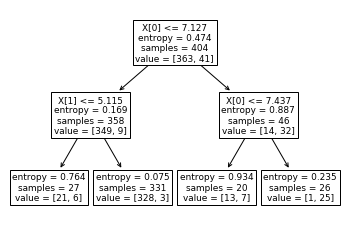

In [30]:
from sklearn.tree import DecisionTreeClassifier
#Creating our decision tree with 4 leaf nodes as the previous question
clf = DecisionTreeClassifier(random_state=0,criterion="entropy",splitter='best',max_depth=3,max_leaf_nodes=4)
predict = np.array(bostonData_train[['RM','LSTAT']])
output = np.array(bostonData_train[['highPriced']])
#Fitting our model taking LSTAT and RM as our predictors
model = clf.fit(predict,output)
plot=tree.plot_tree(model)





#Determining predictions on the model 
prediction= model.predict(bostonData_test[['RM','LSTAT']])  
print(classification_report(prediction, bostonData_test. iloc[:,-1]))


#get the leaf for each training sample
leaves_index = clf.apply(bostonData_train[['RM','LSTAT']]) 

#using Counter to find the number of elements in sample on each leaf
count = Counter( leaves_index )



leaf1 = list(count.values())[2]
leaf1_val = clf.tree_.value[5][0]
print("probability of no class in left node left leaf is ",leaf1_val[0]/leaf1)
print("probability of yes class in left node left leaf is ",leaf1_val[1]/leaf1)
print("")
#leaf 2
leaf2 = list(count.values())[0]
leaf2_val = clf.tree_.value[6][0]
print("probability of no class in left node right leaf is ",leaf2_val[0]/leaf2)
print("probability of yes class in left node right leaf is ",leaf2_val[1]/leaf2)
print("")
#leaf 3
leaf3 = list(count.values())[1]
leaf3_val = clf.tree_.value[3][0]
print("probability of no class in right node left leaf is ",leaf3_val[0]/leaf3)
print("probability of yes class in right node left leaf is ",leaf3_val[1]/leaf3)
print("")
#leaf 4
leaf4 = list(count.values())[3]
leaf4_val = clf.tree_.value[4][0]
print("probability of no class in right node right leaf is ",leaf4_val[0]/leaf4)
print("probability of yes class in right node right leaf is ",leaf4_val[1]/leaf4)
print("")


**14. Use sklearn’s BaggingClassiﬁer to create a bagging classiﬁer whose base is a DecisionTreeClassiﬁer with 2 levels and entropy as the split criterion. Train it on your training dataset and make predictions for your test dataset. How does this bagging classiﬁer perform compared to the decision tree you created in question 13?**

Answer : On creating the bagging classifier using a DecisionTreeClassifier as our base, we get an accuracy of 97%,similar to our model created without the bagging classifier. Due to the high class imbalance the model falters in classfying the target variable as HighPriced which we can see as the precision of the model is still 57%. However the model still accurately classifies the revlevant highPriced values as seen since the model has a high recall.(97% for classifying the target variable as Yes and 100% for classifying the target variable as No).

In [31]:
clf2 = DecisionTreeClassifier(criterion = 'entropy', max_depth = 2) 
bagging = BaggingClassifier(base_estimator = clf2) 
bagging.fit(bostonData_train[['RM','LSTAT']],bostonData_train.iloc[:,-1]) 
prediction_bagging= bagging.predict(bostonData_test[['RM','LSTAT']])
print(classification_report(prediction_bagging, bostonData_test. iloc[:,-1]))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        98
           1       0.57      1.00      0.73         4

    accuracy                           0.97       102
   macro avg       0.79      0.98      0.86       102
weighted avg       0.98      0.97      0.97       102



**15. Use sklearn’s RandomForestClassiﬁer to create a random forest classiﬁer whose base is a decision tree with 2 levels and entropy as the split criterion. Train it on your training dataset and make predictions for your test dataset. How does this random forest classiﬁer perform compared to the classiﬁers you created in questions 13 and 14?**

Answer : On creating a RandomForestClassifier with the Decision tree as our base , the model has the same accuracy as we have seen in question 13 and 14 (97%) with same precision and recall values as in Q13 and 14. 

In [32]:
clf3 = RandomForestClassifier(n_estimators = 1, criterion = 'entropy', max_depth = 2) 
clf3.fit(bostonData_train[['RM','LSTAT']],bostonData_train.iloc[:,-1])
prediction_rf = clf3.predict(bostonData_test[['RM','LSTAT']]) 
print(classification_report(prediction_rf, bostonData_test.iloc [:,-1]))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        97
           1       0.29      0.40      0.33         5

    accuracy                           0.92       102
   macro avg       0.63      0.67      0.65       102
weighted avg       0.93      0.92      0.93       102

